In [2]:
import sys
sys.path.append('../03-code/')
import os
from config import PROJECT_ROOT_DIRECTORY, VASP_USER_SETTING_DICT


In [ ]:
refine_set_path = PROJECT_ROOT_DIRECTORY + '01-rawdata/08-refine-set/'
bs_set_path = PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/'

bs_set_incar_settings = VASP_USER_SETTING_DICT['bs_set_incar_settings']
bs_set_kpoints_settings = VASP_USER_SETTING_DICT['bs_set_kpoints_settings']

#### Band structure at PBE level
step 1: standard self-consistent run at PBE level, with CHGCAR saved

step 2: non-SC calculation
- copy preconvered CHGCAR file to folder
- suitable KPOINTS file specifying k-path

In [2]:
from pymatgen.core import Structure
from pymatgen.io.vasp.sets import MPStaticSet

def make_bs_set(identifier):

    filename = os.path.join(refine_set_path,str(identifier),'CONTCAR')
    structure = Structure.from_file(filename = filename)
    bs_set = MPStaticSet(
        structure = structure,
        user_incar_settings = bs_set_incar_settings,
        user_kpoints_settings = bs_set_kpoints_settings,
        user_potcar_functional = 'PBE_54',
    )

    bs_set.write_input(output_dir=os.path.join(bs_set_path, str(identifier)))

In [ ]:
make_bs_set(26)

In [ ]:
from pymatgen.io.vasp.sets import MPNonSCFSet, Kpoints
from pymatgen.symmetry.bandstructure import HighSymmKpath

identifier = 26

# Load your structure
filename = os.path.join(refine_set_path, str(identifier), 'CONTCAR')
structure = Structure.from_file(filename=filename)

# Step 1: Set up SCF calculation using MPStaticSet
scf_input_set = MPStaticSet(
    structure=structure,
    user_incar_settings=bs_set_incar_settings,
    user_potcar_functional="PBE_54"
)
scf_input_set.write_input(output_dir=os.path.join(bs_set_path, str(identifier), "SCF"))

# Step 2: Set up NSCF calculation for band structure along specified k-path
# Generate k-path based on the crystal symmetry
kpath = HighSymmKpath(structure)
kpath.kpath['path'] = [['\\Gamma', 'X', 'L', 'Y', '\\Gamma', 'Z']]
kpoints = kpath.get_kpoints(line_density=10)

# create Kpoints object with the k-path G-X-L-Y-G-Z
kpoints_object = Kpoints(comment="Band Structure Calculation", 
                         style=Kpoints.supported_modes.Line_mode, 
                         num_kpts=10, 
                         kpts=kpoints)


# Create input set for band structure calculation
nscf_input_set = MPNonSCFSet(
    structure=structure,
    user_incar_settings=bs_set_incar_settings,
    user_kpoints_settings=kpoints_object,
    user_potcar_functional="PBE_54"
)

nscf_input_set.write_input(output_dir=os.path.join(bs_set_path, str(identifier), "BS"))

print("Input files for SCF and NSCF band structure calculations have been generated.")

In [8]:
kpath = HighSymmKpath(structure)

/Users/yongxinlyu/opt/anaconda3/envs/dj-perovskite-env/lib/python3.12/site-packages/pymatgen/symmetry/kpath.py:177: UserWarning: The input structure does not match the expected standard primitive! The path may be incorrect. Use at your own risk.
  warn(


In [16]:
kpoints = kpath.kpath['kpoints']
path = kpath.kpath['path']

In [23]:
kpoints

{'\\Gamma': array([0., 0., 0.]),
 'L': array([0.5, 0.5, 0. ]),
 'M': array([0. , 0.5, 0.5]),
 'N': array([0.5, 0. , 0.5]),
 'R': array([0.5, 0.5, 0.5]),
 'X': array([0.5, 0. , 0. ]),
 'Y': array([0. , 0.5, 0. ]),
 'Z': array([0. , 0. , 0.5])}

In [20]:
# create new path with Gamma-X-L-Y-Gamma-Z
new_path = [['\\Gamma', 'X', 'L','Y','\\Gamma','Z']]


In [21]:
kpath.kpath['path'] = new_path

In [22]:
kpath.get_kpoints(line_density=10)

([array([0., 0., 0.]),
  array([ 8.51604499e-02, -1.37798930e-05, -4.57016066e-06]),
  array([ 1.70320900e-01, -2.75597861e-05, -9.14032133e-06]),
  array([ 2.55481350e-01, -4.13396791e-05, -1.37104820e-05]),
  array([ 2.55481350e-01, -4.13396791e-05, -1.37104820e-05]),
  array([ 2.55481350e-01,  8.51118932e-02, -1.97424917e-05]),
  array([ 2.55481350e-01,  1.70265126e-01, -2.57745015e-05]),
  array([ 2.55481350e-01,  2.55418359e-01, -3.18065113e-05]),
  array([ 2.55481350e-01,  2.55418359e-01, -3.18065113e-05]),
  array([ 1.70320900e-01,  2.55432139e-01, -2.72363506e-05]),
  array([ 8.51604499e-02,  2.55445919e-01, -2.26661899e-05]),
  array([ 0.00000000e+00,  2.55459699e-01, -1.80960293e-05]),
  array([ 0.00000000e+00,  2.55459699e-01, -1.80960293e-05]),
  array([ 0.00000000e+00,  1.70306466e-01, -1.20640195e-05]),
  array([ 0.00000000e+00,  8.51532329e-02, -6.03200975e-06]),
  array([0., 0., 0.]),
  array([0., 0., 0.]),
  array([0.        , 0.        , 0.08138932]),
  array([0.     

#### Partial charge density plot (HSE)

Notes: 
Step 1: Ground state calculation (hse set) is well converged, with WAVECAR saved

Step 2: Copy INCAR, POSCAR, KPOINTS, POTCAR, WAVECAR to a new directory

Step 3: add the following lines to INCAR file. IBANDS value can be find in EIGENVAL

LPARD = True

IBAND = 20 21 22 23 45 ... (2 states in total)

In [ ]:
# partial charge density plot
# Notes: 

#### DOS plot (HSE)

Notes: 
Step 1: Ground state calculation (hse set) is well converged, with CHGCAR, WAVECAR saved

Step 2: Copy INCAR, POSCAR, KPOINTS, POTCAR, CHGCAR, WAVECAR to a new directory

Step 3: add the following lines to INCAR file. VBM and CBM values can be find in EIGENVAL

ISTART = 1  # read WAVECAR

ICHARG = 11  # keep CHGCAR constant

EMIN = -5 (VBM-5)

EMAX = 5 (CBM+5)

In [86]:
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.electronic_structure.plotter import DosPlotter

v = Vasprun(PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/39/39-bs-G-X/vasprun.xml')
cdos = v.complete_dos
element_dos = cdos.get_element_dos()


/Users/yongxinlyu/opt/anaconda3/envs/dj-perovskite-env/lib/python3.12/site-packages/pymatgen/io/vasp/outputs.py:134: UserWarning:

Float overflow (*******) encountered in vasprun



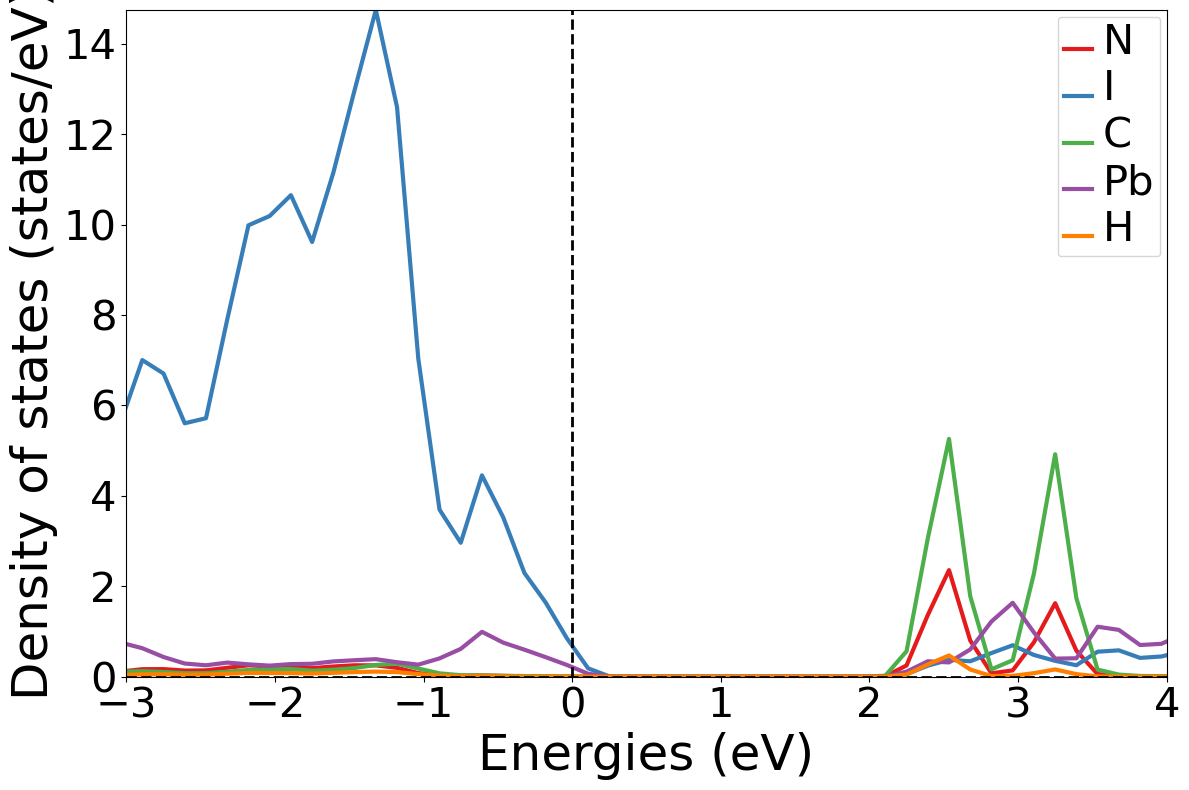

In [87]:
plotter = DosPlotter(sigma=0.1)
plotter.add_dos_dict(element_dos)
plotter.save_plot(xlim=[-3, 4],filename='../rawfigures/dos.svg')

In [33]:


vaspout = Vasprun(PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/39/39-bs-G-X/vasprun.xml',parse_projected_eigen=True)
bandstr = vaspout.get_band_structure(line_mode=True)


<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{E\\ -\\ E_f\\ (eV)}$'>

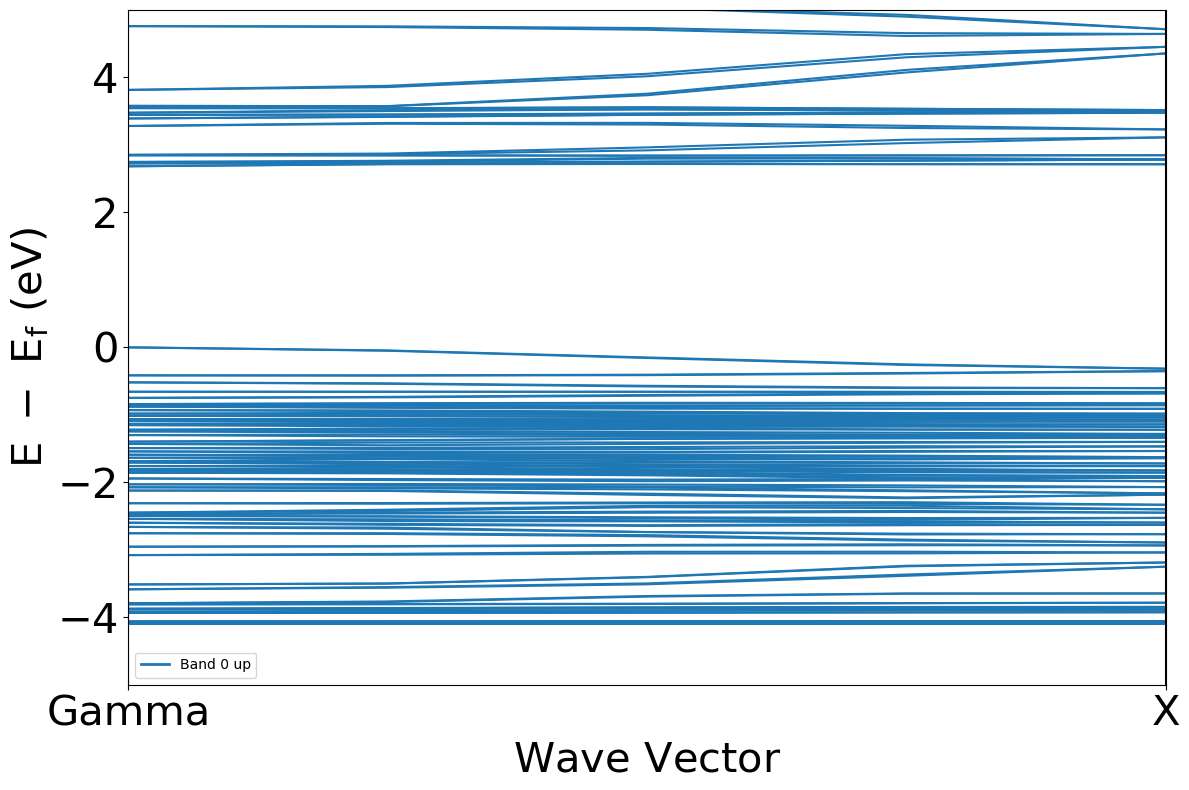

In [34]:
from pymatgen.electronic_structure.plotter import BSPlotter
plotter = BSPlotter(bandstr)
plotter.get_plot(ylim=[-5, 5])


[<Axes: title={'center': '${\\mathrm{C}}_{\\mathrm{p}}$'}>]

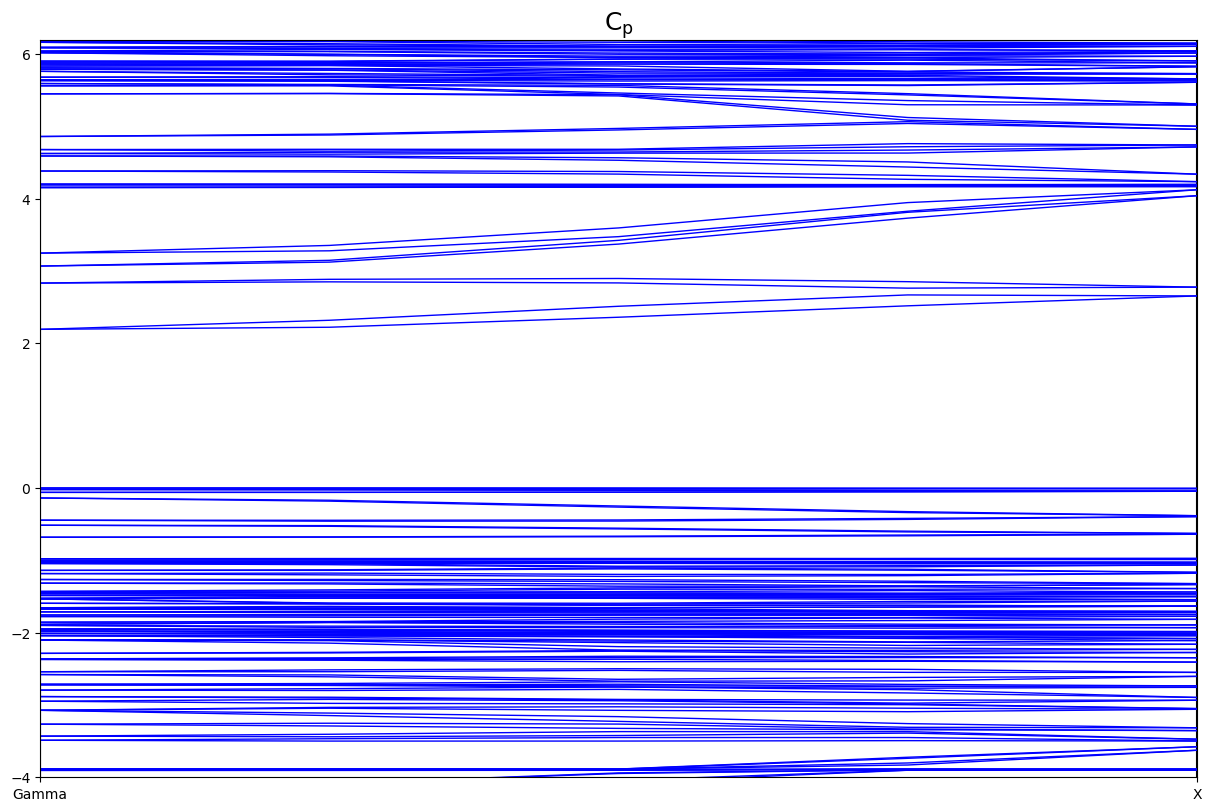

In [30]:
from pymatgen.electronic_structure.plotter import BSPlotterProjected    
bs_plotter_p = BSPlotterProjected(bandstr)
bs_plotter_p.get_projected_plots_dots({'C':['p']})

### Band structure calculation
see tutorial at https://www.vasp.at/wiki/index.php/Band-structure_calculation_using_hybrid_functionals
- Step 1: scf calculation (hse set) is well converged, with CHGCAR, WAVECAR saved (single gamma point)
- Step 2: repeat the scf with denser kpoint grid (2,2 in xy plane), start from previous CHGCAR and WAVECAR (expect to converge in 6 steps)
- Step 3: restart the hybrid calculation using the CHGCAR and WAVECAR in step 2, with KPOINTS and KPOINTS_OPT. (regular k-mesh expect to converge in 2 steps, then start calculation in specified K-path.)

** recommend to use VASP6.4.2, supply a KPOINTS_OPT file with desired k-path in Step 3.
- IMPORTANT: set HFRCUT=-1 in INCAR.

see-kpath can be used to determine the k-path https://www.materialscloud.org/work/tools/seekpath

for VASP6.4.2, the following parameters needs to be specified:
- VDW_S8 = 0.7220
- VDW_SR = 1.2170
- also remove NCORE = 48 from INCAR since the calculation require change of K points, which is possible only when NPAR = no.nodes

Technically step 2 and step 3 can be combined, however, due to the computational cost, calculation is seperated for each k path: G-X, X-L, L-Y, Y-G, G-Z, each path have 5 points.
Step 3 takes lots of memory, for type IIa, Ib, hugemem queue is required on Gadi.


### extract band data from vaspout.h5 file

In [15]:
from py4vasp import Calculation
bs_set_directory = PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/376/376-bs-Y-G/'
calc = Calculation.from_path(bs_set_directory)
graph = calc.band.to_plotly(selection="kpoints_opt")
graph.update_layout(yaxis_range=[-5, 5],width=400, height=600,)
graph.show()

In [16]:
import pandas as pd
kpoint_distances = pd.DataFrame(data=calc.kpoint.distances("kpoints_opt"),columns=['distances'])
kpoint_distances.to_csv(bs_set_directory + 'kpoint_distances.csv')


In [17]:
df_band = calc.band.to_frame("kpoints_opt(Pb, I, C, N, H)")
df_band['organic'] = df_band['C'] + df_band['N'] + df_band['H']
df_band['inorganic'] = df_band['Pb'] + df_band['I']

# put another column where iterating from 0,1,2,3,4,0,1,2,3,4,...
df_band['kpoint_index'] = range(len(df_band))
df_band['kpoint_index'] = df_band['kpoint_index'] % 5

# put anothe column where iterating from 0,0,0,0,0,1,1,1,1,1,...
df_band['band_index'] = range(len(df_band))
df_band['band_index'] = df_band['band_index'] // 5

df_band['organic_ratio'] = abs(df_band['organic']) / (abs(df_band['organic']) + abs(df_band['inorganic']))
df_band.to_csv(bs_set_directory + 'band.csv',index=False)

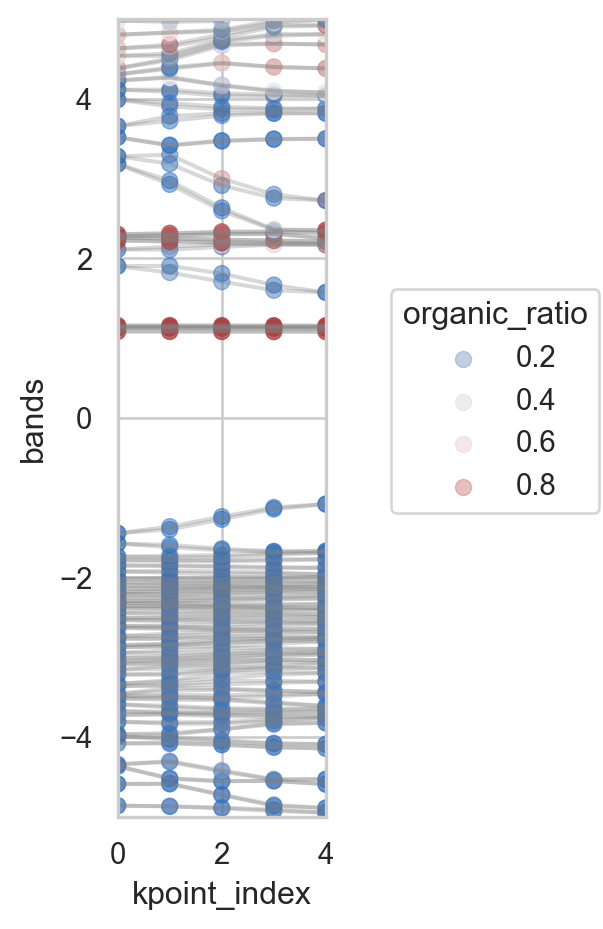

In [18]:
import seaborn.objects as so
from seaborn import axes_style

df_band = pd.read_csv(bs_set_directory + 'band.csv')
(
    so.Plot(df_band.query('bands<5 and bands>-5'),x='kpoint_index', y='bands')
    .add(so.Lines(color='grey', alpha=0.3),group='band_index')
    .add(so.Dot(alpha=0.5),color='organic_ratio') #,pointsize='organic_ratio'
    .layout(size=(2,5))
    .scale(color='vlag') #RdBu_r
    .limit(x=(0,4), y=(-5,5))
    .theme(axes_style("whitegrid"))

)

### Putting the bandstructure together

In [19]:
identifier = 376
df_band_full = pd.DataFrame()
energy_reference_dict = {}

bandstructure_G_X_csv = PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/' + str(identifier) + '/' + str(identifier) + '-bs-G-X/band.csv'
df_k_path = pd.read_csv(bandstructure_G_X_csv)
energy_reference_dict['X'] = df_k_path.query('kpoint_index==4')['bands'].iloc[0]
df_band_full = pd.concat([df_band_full, df_k_path], ignore_index=True)

bandstructure_X_L_csv = PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/' + str(identifier) + '/' + str(identifier) + '-bs-X-L/band.csv'
df_k_path = pd.read_csv(bandstructure_X_L_csv)
energy_difference = df_k_path.query('kpoint_index==0')['bands'][0] - energy_reference_dict['X']
df_k_path['bands'] = df_k_path['bands'] - energy_difference
energy_reference_dict['L'] = df_k_path.query('kpoint_index==4')['bands'].iloc[0]
df_k_path['kpoint_index'] = df_k_path['kpoint_index'] + 4  # Adjust kpoint_index to continue from the previous path
df_band_full = pd.concat([df_band_full, df_k_path.query('kpoint_index > 4')], ignore_index=True)
    
bandstructure_L_Y_csv = PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/' + str(identifier) + '/' + str(identifier) + '-bs-L-Y/band.csv'
df_k_path = pd.read_csv(bandstructure_L_Y_csv)
energy_difference = df_k_path.query('kpoint_index==0')['bands'][0] - energy_reference_dict['L']
df_k_path['bands'] = df_k_path['bands'] - energy_difference
energy_reference_dict['Y'] = df_k_path.query('kpoint_index==4')['bands'].iloc[0]
df_k_path['kpoint_index'] = df_k_path['kpoint_index'] + 8  # Adjust kpoint_index to continue from the previous path
df_band_full = pd.concat([df_band_full, df_k_path.query('kpoint_index > 8')], ignore_index=True)

bandstructure_Y_G_csv = PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/' + str(identifier) + '/' + str(identifier) + '-bs-Y-G/band.csv'
df_k_path = pd.read_csv(bandstructure_Y_G_csv)
energy_difference = df_k_path.query('kpoint_index==0')['bands'][0] - energy_reference_dict['Y']
df_k_path['bands'] = df_k_path['bands'] - energy_difference
energy_reference_dict['G'] = df_k_path.query('kpoint_index==4')['bands'].iloc[0]
df_k_path['kpoint_index'] = df_k_path['kpoint_index'] + 12  # Adjust kpoint_index to continue from the previous path
df_band_full = pd.concat([df_band_full, df_k_path.query('kpoint_index > 12')], ignore_index=True)

bandstructure_G_Z_csv = PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/' + str(identifier) + '/' + str(identifier) + '-bs-G-Z/band.csv'
df_k_path = pd.read_csv(bandstructure_G_Z_csv)
energy_difference = df_k_path.query('kpoint_index==0')['bands'][0] - energy_reference_dict['G']
df_k_path['bands'] = df_k_path['bands'] - energy_difference
df_k_path['kpoint_index'] = df_k_path['kpoint_index'] + 16  # Adjust kpoint_index to continue from the previous path
df_band_full = pd.concat([df_band_full, df_k_path.query('kpoint_index > 16')], ignore_index=True)

In [20]:
df_kpoint_distance_full = pd.DataFrame()
kpoint_distance_path = PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/' + str(identifier) + '/' + str(identifier) + '-bs-G-X/kpoint_distances.csv'
df_kpoint_distance = pd.read_csv(kpoint_distance_path)
df_kpoint_distance_full = pd.concat([df_kpoint_distance_full, df_kpoint_distance], ignore_index=True)
last_distance = df_kpoint_distance['distances'].iloc[-1]

kpoint_distance_path = PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/' + str(identifier) + '/' + str(identifier) + '-bs-X-L/kpoint_distances.csv'
df_kpoint_distance = pd.read_csv(kpoint_distance_path)
df_kpoint_distance['distances'] = df_kpoint_distance['distances'] + last_distance
df_kpoint_distance_full = pd.concat([df_kpoint_distance_full, df_kpoint_distance.iloc[1:]], ignore_index=True)
last_distance = df_kpoint_distance['distances'].iloc[-1]

kpoint_distance_path = PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/' + str(identifier) + '/' + str(identifier) + '-bs-L-Y/kpoint_distances.csv'
df_kpoint_distance = pd.read_csv(kpoint_distance_path)
df_kpoint_distance['distances'] = df_kpoint_distance['distances'] + last_distance
df_kpoint_distance_full = pd.concat([df_kpoint_distance_full, df_kpoint_distance.iloc[1:]], ignore_index=True)
last_distance = df_kpoint_distance['distances'].iloc[-1]

kpoint_distance_path = PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/' + str(identifier) + '/' + str(identifier) + '-bs-Y-G/kpoint_distances.csv'
df_kpoint_distance = pd.read_csv(kpoint_distance_path)
df_kpoint_distance['distances'] = df_kpoint_distance['distances'] + last_distance
df_kpoint_distance_full = pd.concat([df_kpoint_distance_full, df_kpoint_distance.iloc[1:]], ignore_index=True)
last_distance = df_kpoint_distance['distances'].iloc[-1]

kpoint_distance_path = PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/' + str(identifier) + '/' + str(identifier) + '-bs-G-Z/kpoint_distances.csv'
df_kpoint_distance = pd.read_csv(kpoint_distance_path)
df_kpoint_distance['distances'] = df_kpoint_distance['distances'] + last_distance
df_kpoint_distance_full = pd.concat([df_kpoint_distance_full, df_kpoint_distance.iloc[1:]], ignore_index=True)


In [21]:
df_kpoint_distance_full.tail()

,Unnamed: 0,distances
16,4,0.164229
17,1,0.175869
18,2,0.187509
19,3,0.199149
20,4,0.210790


In [22]:
df_kpoint_distance_full.columns = ['kpoint_index', 'distances']

In [23]:
df_band_full

,bands,occupations,Pb,I,C,N,H,organic,inorganic,kpoint_index,band_index,organic_ratio
0,-27.846471,1.0,-1.568114e-08,-0.000008,-0.055671,-0.303817,-0.010675,-0.370163,-0.000008,0,0,0.999979
1,-27.846475,1.0,-1.531072e-08,-0.000008,-0.055605,-0.303460,-0.010662,-0.369727,-0.000008,1,0,0.999979
2,-27.846487,1.0,-1.549567e-08,-0.000008,-0.055555,-0.303188,-0.010653,-0.369397,-0.000008,2,0,0.999979
3,-27.846487,1.0,-1.515690e-08,-0.000008,-0.055538,-0.303093,-0.010650,-0.369281,-0.000008,3,0,0.999979
4,-27.846491,1.0,-1.563278e-08,-0.000008,-0.055640,-0.303653,-0.010669,-0.369962,-0.000008,4,0,0.999979
...,...,...,...,...,...,...,...,...,...,...,...,...
12091,9.927475,0.0,5.486788e-02,0.186275,0.103460,0.066859,0.082009,0.252329,0.241143,20,574,0.511334
12092,10.038682,0.0,1.484991e-02,0.039647,0.040404,0.027887,0.018389,0.086681,0.054497,17,575,0.613983
12093,10.050181,0.0,2.211693e-02,0.096603,0.019850,0.016365,0.025456,0.061671,0.118720,18,575,0.341874
12094,10.006196,0.0,6.919671e-02,0.232322,0.085804,0.057014,0.053597,0.196415,0.301519,19,575,0.394460


In [24]:
# create a new column in df_band_full called 'kpoint_distance' based on kpoint_index and df_kpoint_distance_full
df_band_full['kpoint_distance'] = df_kpoint_distance_full['distances'].iloc[df_band_full['kpoint_index']].values

In [29]:
df_band_full['bands_corrected'] = df_band_full['bands'] +1.1

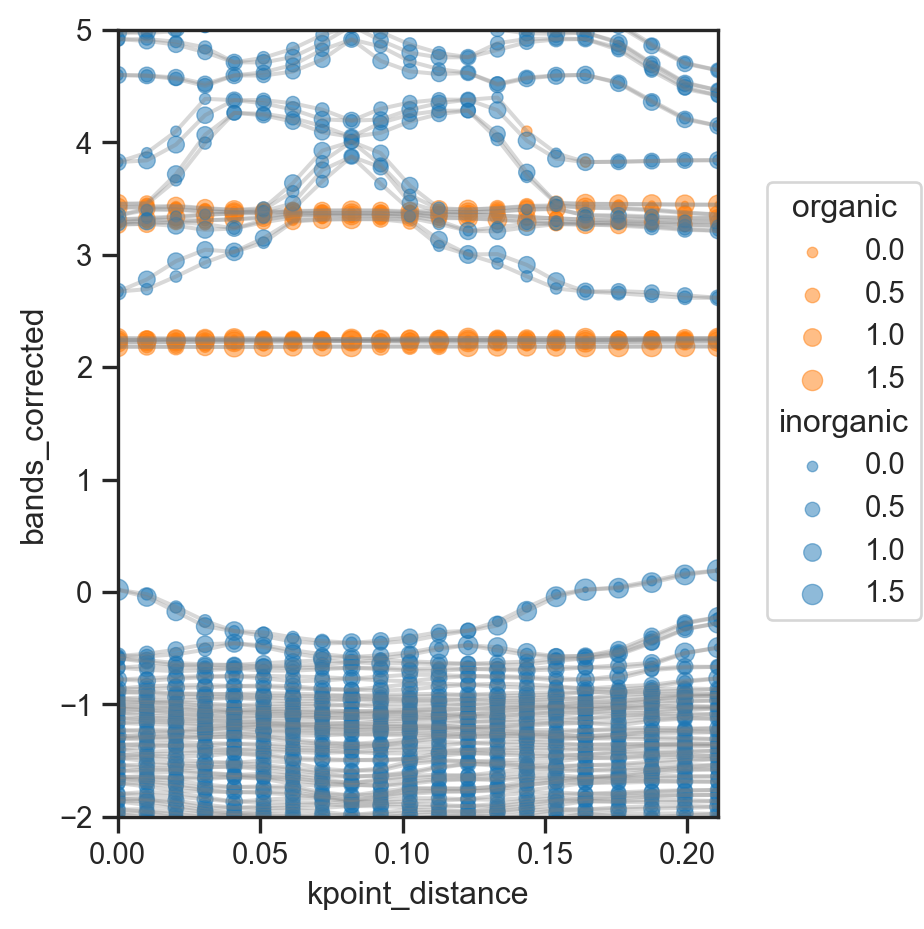

In [30]:
(
    so.Plot(df_band_full.query('bands<5 and bands>-5'),x='kpoint_distance', y='bands_corrected')
    .add(so.Lines(color='grey', alpha=0.3),group='band_index')
    
    #.add(so.Dot(alpha=0.5,color="tab:blue"),data = df_band_full.query('bands<5 and bands>-5 and organic_ratio <0.5'), pointsize='inorganic')
    .add(so.Dot(alpha=0.5,color = "tab:orange"),data = df_band_full.query('bands<5 and bands>-5 and organic_ratio >=0.5'), pointsize='organic')
    .add(so.Dot(alpha=0.5,color="tab:blue"),data = df_band_full.query('bands<5 and bands>-5 and organic_ratio <0.5'), pointsize='inorganic')
    .layout(size=(4,5))
    #.scale(pointsize=[0,5]) #RdBu_r
    .limit(x=(0,max(df_band_full.kpoint_distance)), y=(-2,5))
    .theme(axes_style("ticks"))
    .save('../rawfigures/band_structure.svg')

)

In [197]:
df_band_full.to_csv(PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/' + str(identifier) + '/band_full.csv', index=False)

In [199]:
df_kpoint_distance_full.to_csv(PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/' + str(identifier) + '/kpoint_distances.csv', index=True)

### PDOS and partial charge visualization

In [85]:
import numpy as np
import pandas as pd
from pymatgen.electronic_structure.core import Spin
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.electronic_structure.plotter import DosPlotter

identifier = 1846395
partial_charge_path = PROJECT_ROOT_DIRECTORY + '01-rawdata/09-hse-set/'
vasprun_xml_path = os.path.join(partial_charge_path, str(identifier), 'vasprun.xml')

#vasprun_xml_path = os.path.join(PROJECT_ROOT_DIRECTORY + '01-rawdata/16-bs-set/39/39-bs-G-X/vasprun.xml')
vasprun_xml_path = os.path.join(PROJECT_ROOT_DIRECTORY + '01-rawdata/17-partial-charge/type_IIa/205/vasprun.xml')

vasprun = Vasprun(filename = vasprun_xml_path, parse_projected_eigen=True)

nb_kpoints = len(vasprun.actual_kpoints)
efermi = vasprun.efermi
band_structure = vasprun.get_band_structure()
complete_dos = vasprun.complete_dos
nb_bands = band_structure.nb_bands
projection_on_elements = band_structure.get_projection_on_elements()[Spin.up] #return a array with band_index and kpoint_index
bands = band_structure.bands[Spin.up]
cbm_band_index = band_structure.get_cbm()['band_index'][Spin.up][0] #first band in the band pair is cbm
vbm_band_index = band_structure.get_vbm()['band_index'][Spin.up][-1] #second band in the band pair is vbm

def get_organic_inorganic_projection(band_index, kpoint_index):
    organic_inorganic_projection = {'inorganic': 0, 'organic': 0}

    #projection_on_elements on particular band and kpoint
    projection = projection_on_elements[band_index][kpoint_index]
    for element, projection_value in projection.items():
        if element in ['Pb', 'I']:
            organic_inorganic_projection['inorganic'] += projection_value
        else:
            organic_inorganic_projection['organic'] += projection_value
    return organic_inorganic_projection

projection_on_components = []
for band_index in range(nb_bands):
    for kpoint_index in range(nb_kpoints):
        organic_inorganic_projection = get_organic_inorganic_projection(band_index,kpoint_index)
        projection_on_components.append([band_index,kpoint_index,
                                          organic_inorganic_projection['inorganic'],
                                          organic_inorganic_projection['organic'],
                                          bands[band_index][kpoint_index]])
        
projection_on_components = pd.DataFrame(data=np.array(projection_on_components),
                                                           columns=['band_index','kpoint_index','inorganic_projection','organic_projection','bands'])
projection_on_components['inorganic_ratio'] = projection_on_components['inorganic_projection']/(projection_on_components['inorganic_projection']+projection_on_components['organic_projection'])
projection_on_components['organic_ratio'] = projection_on_components['organic_projection']/(projection_on_components['inorganic_projection']+projection_on_components['organic_projection'])


/Users/yongxinlyu/opt/anaconda3/envs/dj-perovskite-env/lib/python3.12/site-packages/pymatgen/io/vasp/outputs.py:1256: UserWarning:

No POTCAR file with matching TITEL fields was found in


/Users/yongxinlyu/opt/anaconda3/envs/dj-perovskite-env/lib/python3.12/site-packages/pymatgen/io/vasp/outputs.py:1274: UserWarning:

No POTCAR file with matching TITEL fields was found in




In [60]:
projection_on_components

,band_index,kpoint_index,inorganic_projection,organic_projection,bands,inorganic_ratio,organic_ratio
0,0.0,0.0,0.0001,0.8326,-22.9988,0.000120,0.999880
1,1.0,0.0,0.0001,0.8327,-22.9984,0.000120,0.999880
2,2.0,0.0,0.0000,0.8327,-22.9966,0.000000,1.000000
3,3.0,0.0,0.0000,0.8326,-22.9963,0.000000,1.000000
4,4.0,0.0,0.0000,0.8326,-22.9550,0.000000,1.000000
...,...,...,...,...,...,...,...
2199,2199.0,0.0,0.0266,0.2274,11.8510,0.104724,0.895276
2200,2200.0,0.0,0.0270,0.2161,11.8579,0.111065,0.888935
2201,2201.0,0.0,0.0190,0.2310,11.8643,0.076000,0.924000
2202,2202.0,0.0,0.0220,0.2374,11.9013,0.084811,0.915189


In [61]:
projection_on_components.query('band_index<=348 and band_index>=344')

,band_index,kpoint_index,inorganic_projection,organic_projection,bands,inorganic_ratio,organic_ratio
344,344.0,0.0,0.0763,0.6586,-13.1108,0.103824,0.896176
345,345.0,0.0,0.0749,0.6597,-13.1090,0.101960,0.898040
346,346.0,0.0,0.0958,0.6366,-13.1043,0.130803,0.869197
347,347.0,0.0,0.0958,0.6362,-13.1036,0.130874,0.869126
348,348.0,0.0,0.0833,0.6486,-13.1004,0.113813,0.886187


In [38]:
# if inorganic ratio is greater than 0.5, it is inorganic
projection_on_components['inorganic'] = projection_on_components['inorganic_ratio'] > 0.5
projection_on_components['bands_fermi'] = projection_on_components['bands']-efermi

In [39]:
projection_on_components

,band_index,kpoint_index,inorganic_projection,organic_projection,bands,inorganic_ratio,organic_ratio,inorganic,bands_fermi
0,0.0,0.0,0.0001,0.8376,-24.3307,0.000119,0.999881,False,-23.56195
1,1.0,0.0,0.0001,0.8376,-24.3307,0.000119,0.999881,False,-23.56195
2,2.0,0.0,0.0001,0.8376,-24.3295,0.000119,0.999881,False,-23.56075
3,3.0,0.0,0.0001,0.8376,-24.3294,0.000119,0.999881,False,-23.56065
4,4.0,0.0,0.0001,0.8377,-24.3287,0.000119,0.999881,False,-23.55995
...,...,...,...,...,...,...,...,...,...
829,829.0,0.0,0.0561,0.1763,9.2950,0.241394,0.758606,False,10.06375
830,830.0,0.0,0.0606,0.1768,9.3056,0.255265,0.744735,False,10.07435
831,831.0,0.0,0.0596,0.1670,9.3200,0.263019,0.736981,False,10.08875
832,832.0,0.0,0.0598,0.1684,9.3586,0.262051,0.737949,False,10.12735


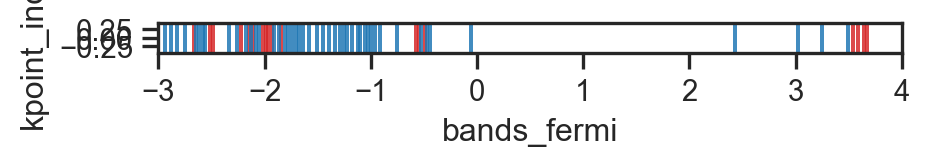

In [28]:
import seaborn.objects as so
from seaborn import axes_style

(
    so.Plot(projection_on_components, y='kpoint_index',x='bands_fermi', color='inorganic')
    .add(so.Dash(alpha=0.6),orient='y',legend=False)
    .limit(x=(-3,4))
    .theme(axes_style('ticks'))
    .scale(color={True:'tab:blue', False:'tab:red'})
    .layout(size=(5,1))  # 5,1 for single K point at Gamma, 5,1.5 for two K points
    .save('../rawfigures/dos_energy_level.svg')
)

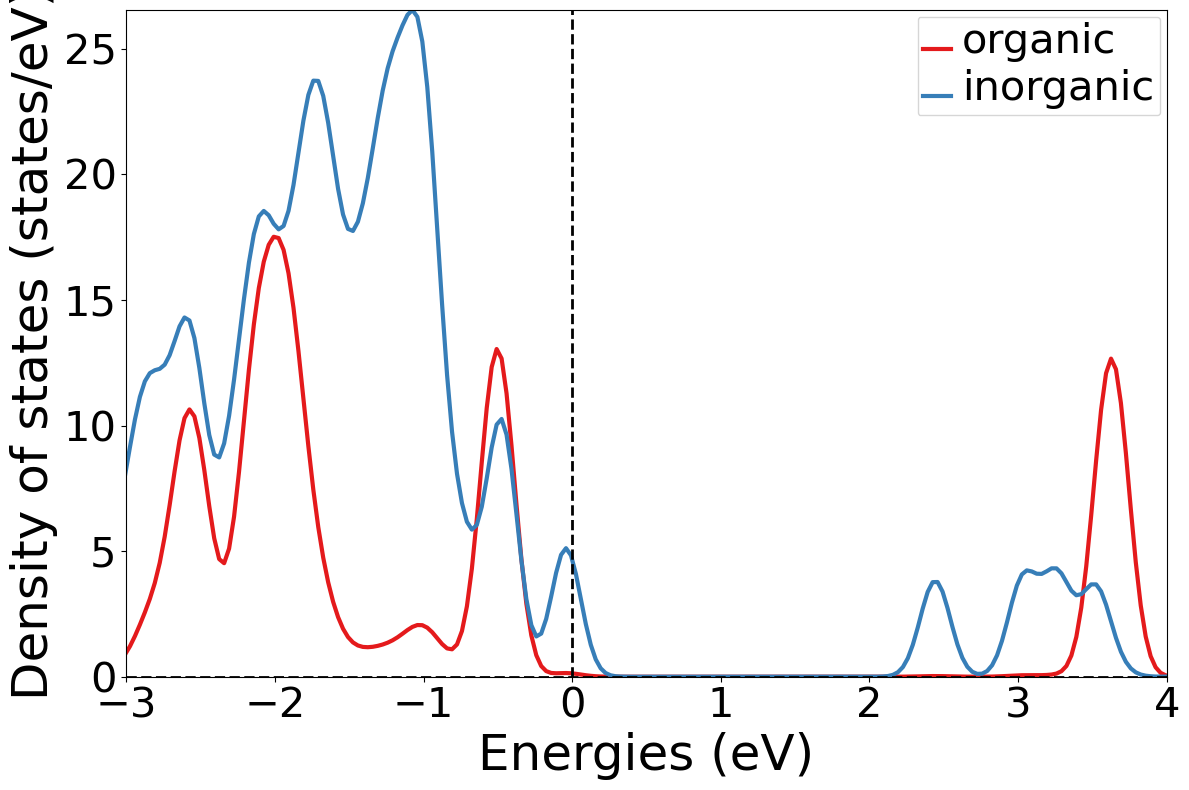

In [25]:

pdos = complete_dos.get_element_dos()
pdos_inorganic_list = []
pdos_organic_list = []

for element in pdos.keys():
    if str(element) in {'Pb', 'I'}:
        pdos_inorganic_list.append(pdos[element])
    else:
        pdos_organic_list.append(pdos[element])

pdos_inorganic = pdos_inorganic_list[0]
for i in range(len(pdos_inorganic_list)-1):
    pdos_inorganic = pdos_inorganic + pdos_inorganic_list[i+1]

pdos_organic = pdos_organic_list[0]
for i in range(len(pdos_organic_list)-1):
    pdos_organic = pdos_organic + pdos_organic_list[i+1]

ax = DosPlotter(sigma=0.1)
ax.add_dos("inorganic", pdos_inorganic)
ax.add_dos("organic", pdos_organic)
#ax.show(xlim=[-3,4])
ax.save_plot(xlim=[-3, 4],filename='../rawfigures/dos.svg')
